In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zy1ukp73RRAE70aQu1Hr")
project = rf.workspace("road-marking-detection").project("road-marking-iflo2")
version = project.version(1)
dataset = version.download("yolov8")



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-marking-1 in yolov8:: 100%|██████████| 3108/3108 [00:00<00:00, 8966.91it/s]


In [8]:
from google.colab import drive
drive.mount('/content/datasets/RoadMarking-1/drive')

Mounted at /content/datasets/RoadMarking-1/drive


## Custom Training

In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 382MB/s]
New https://pypi.org/project/ultralytics/8.2.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/road-marking-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_b

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1716898771.11bbb23e2b94.6244.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1230.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1231.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1232.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content


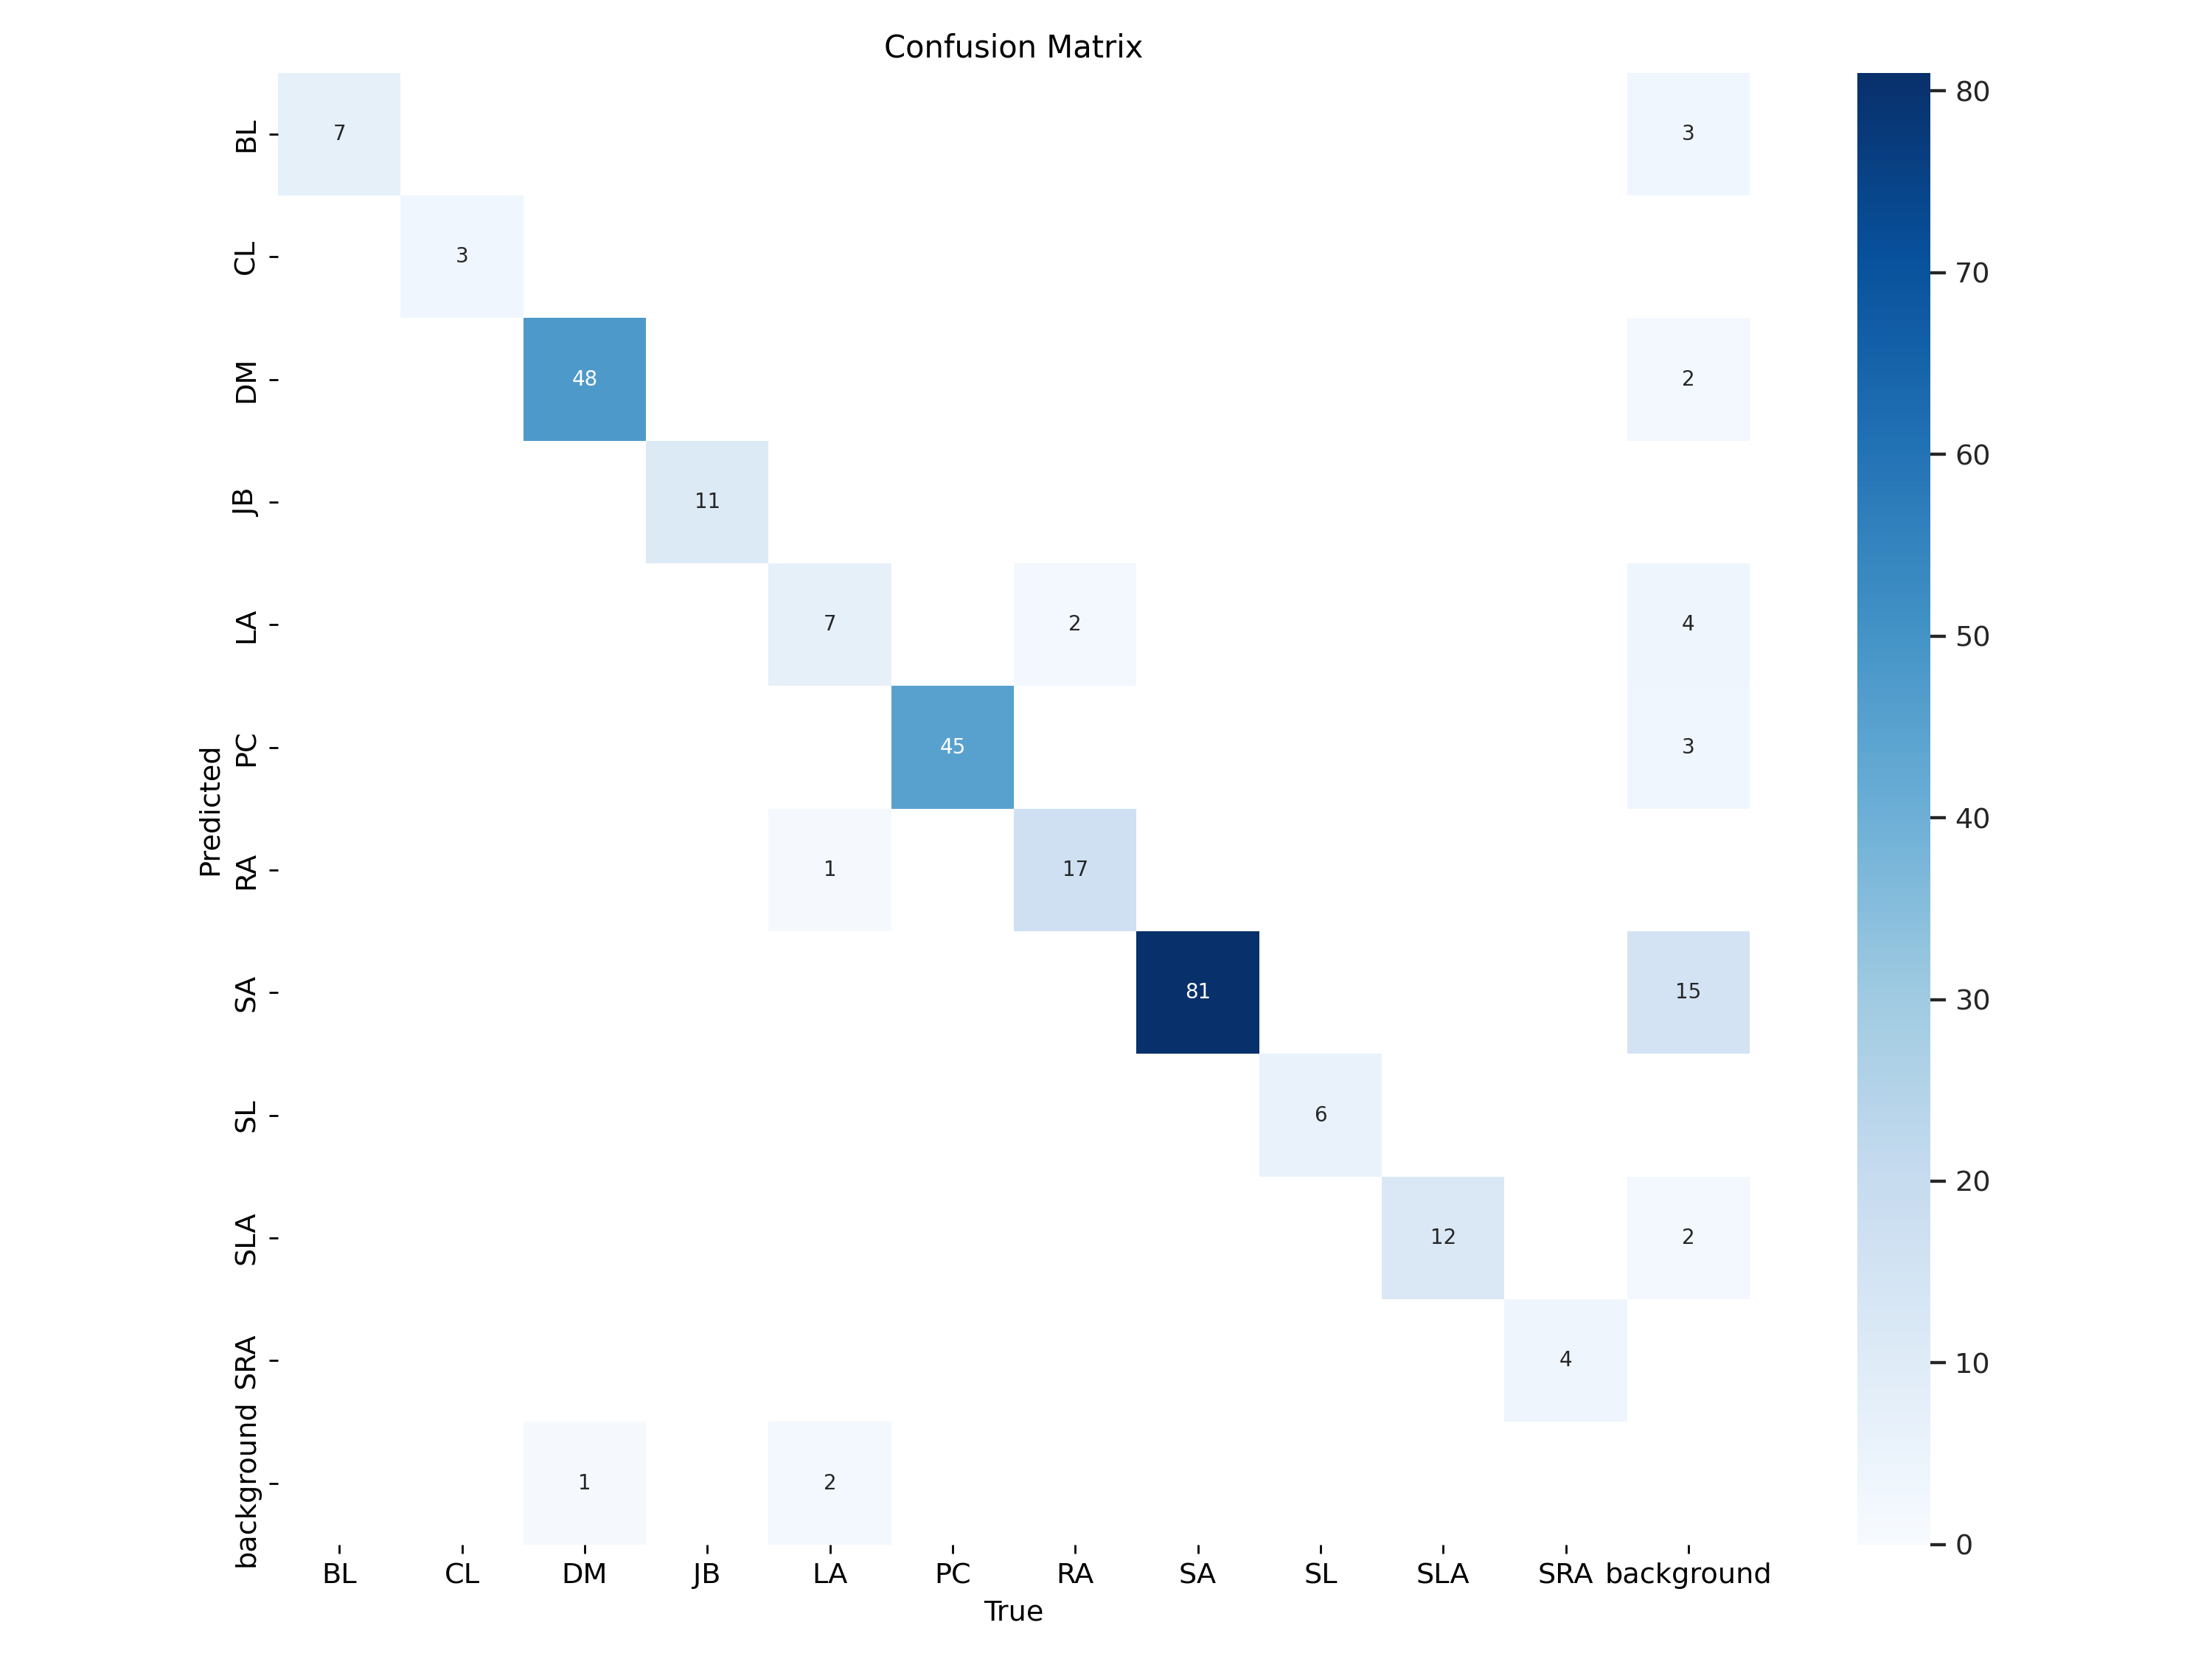

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


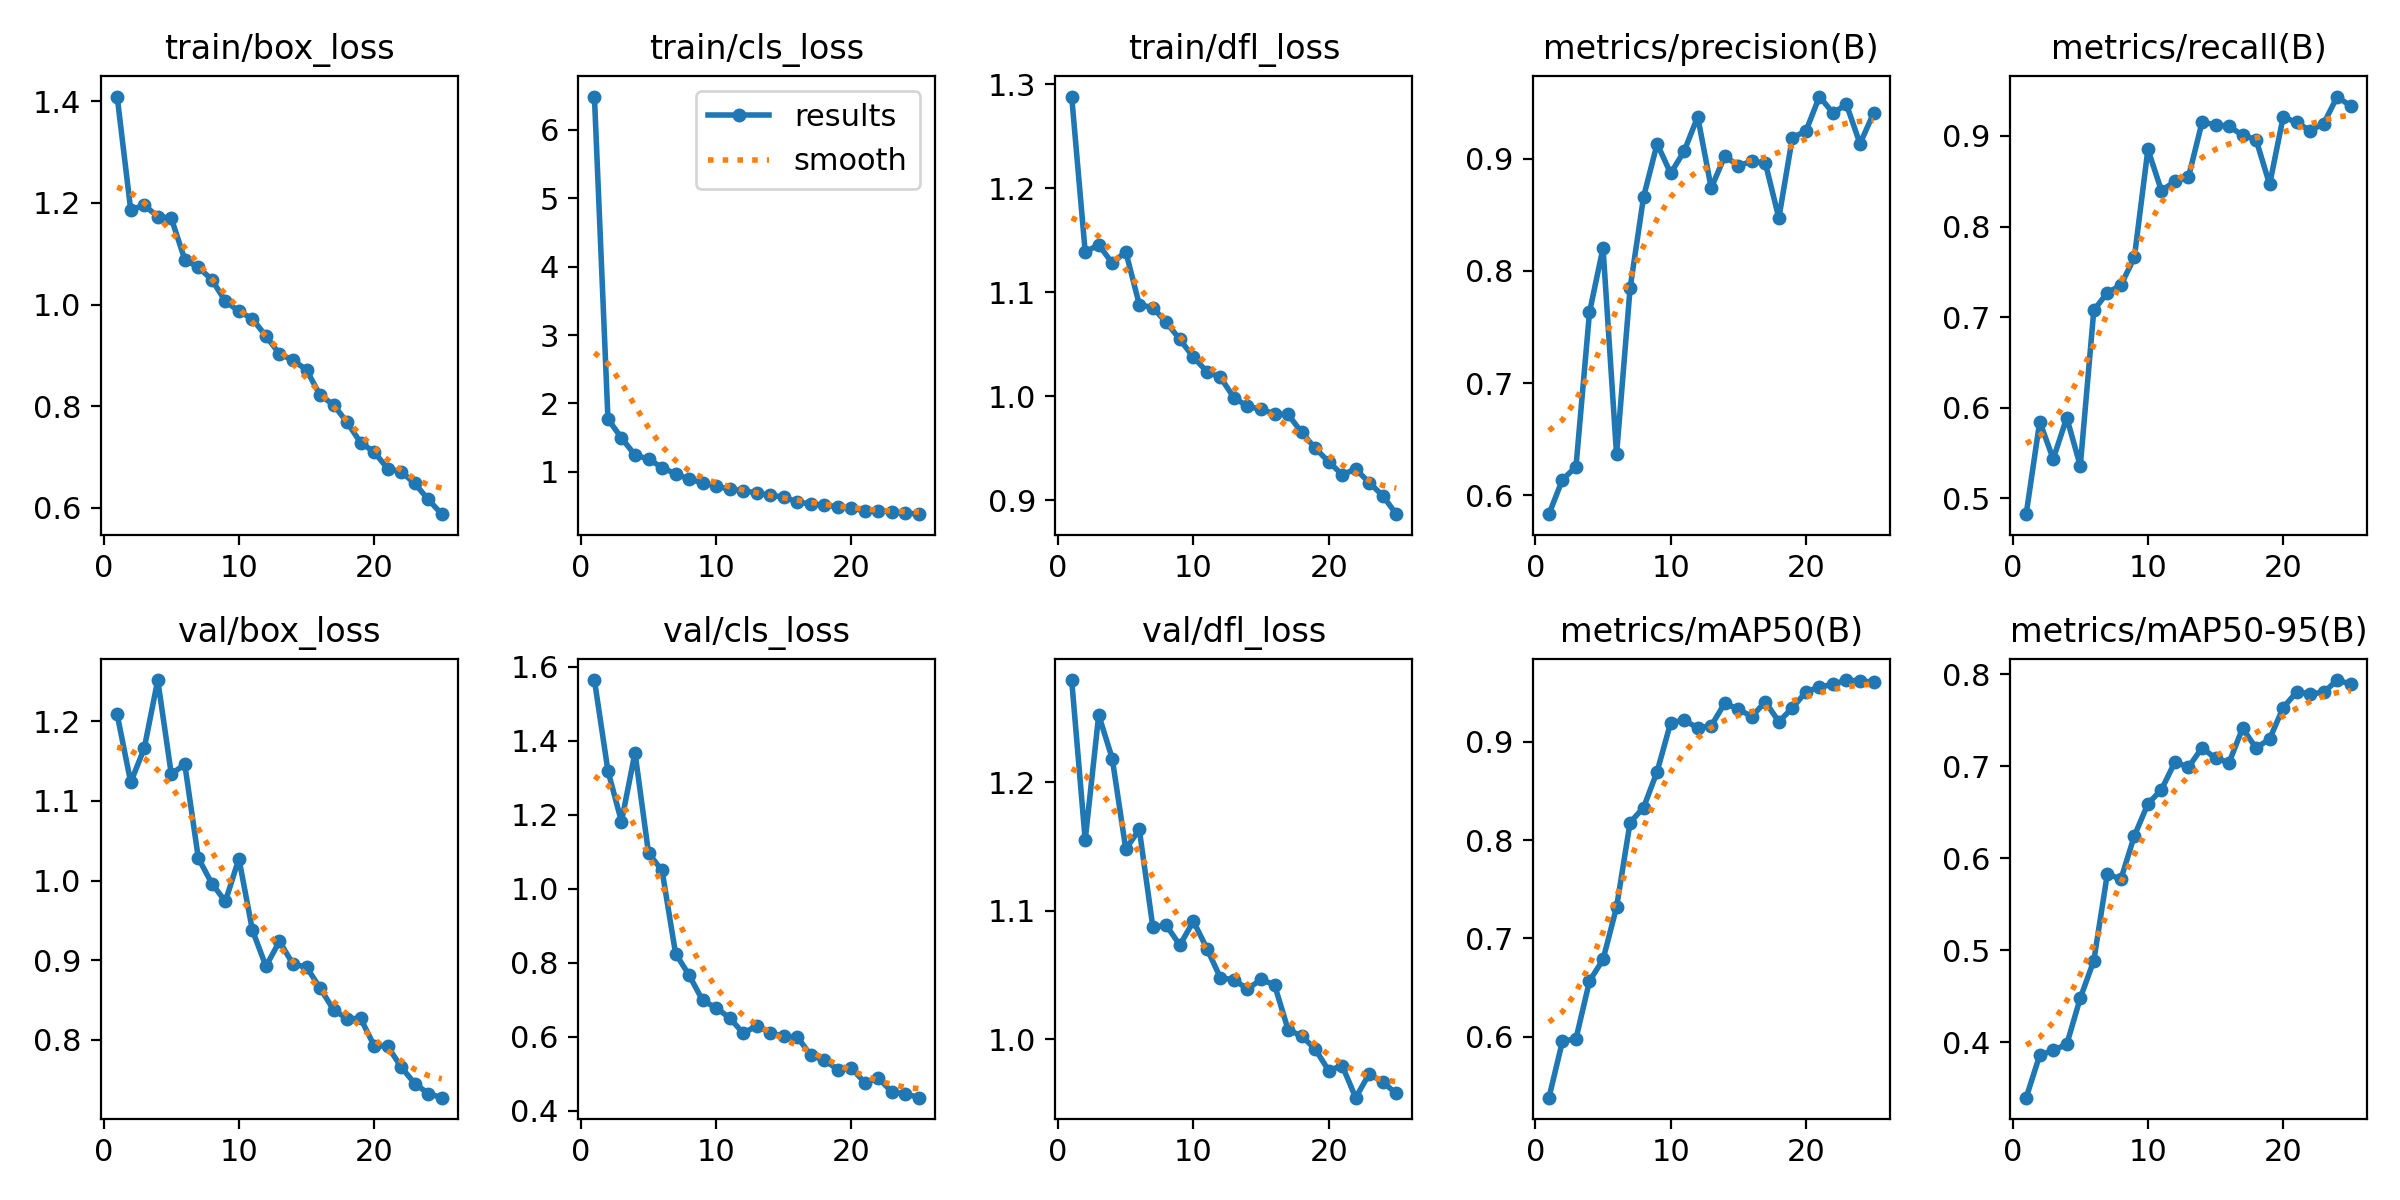

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


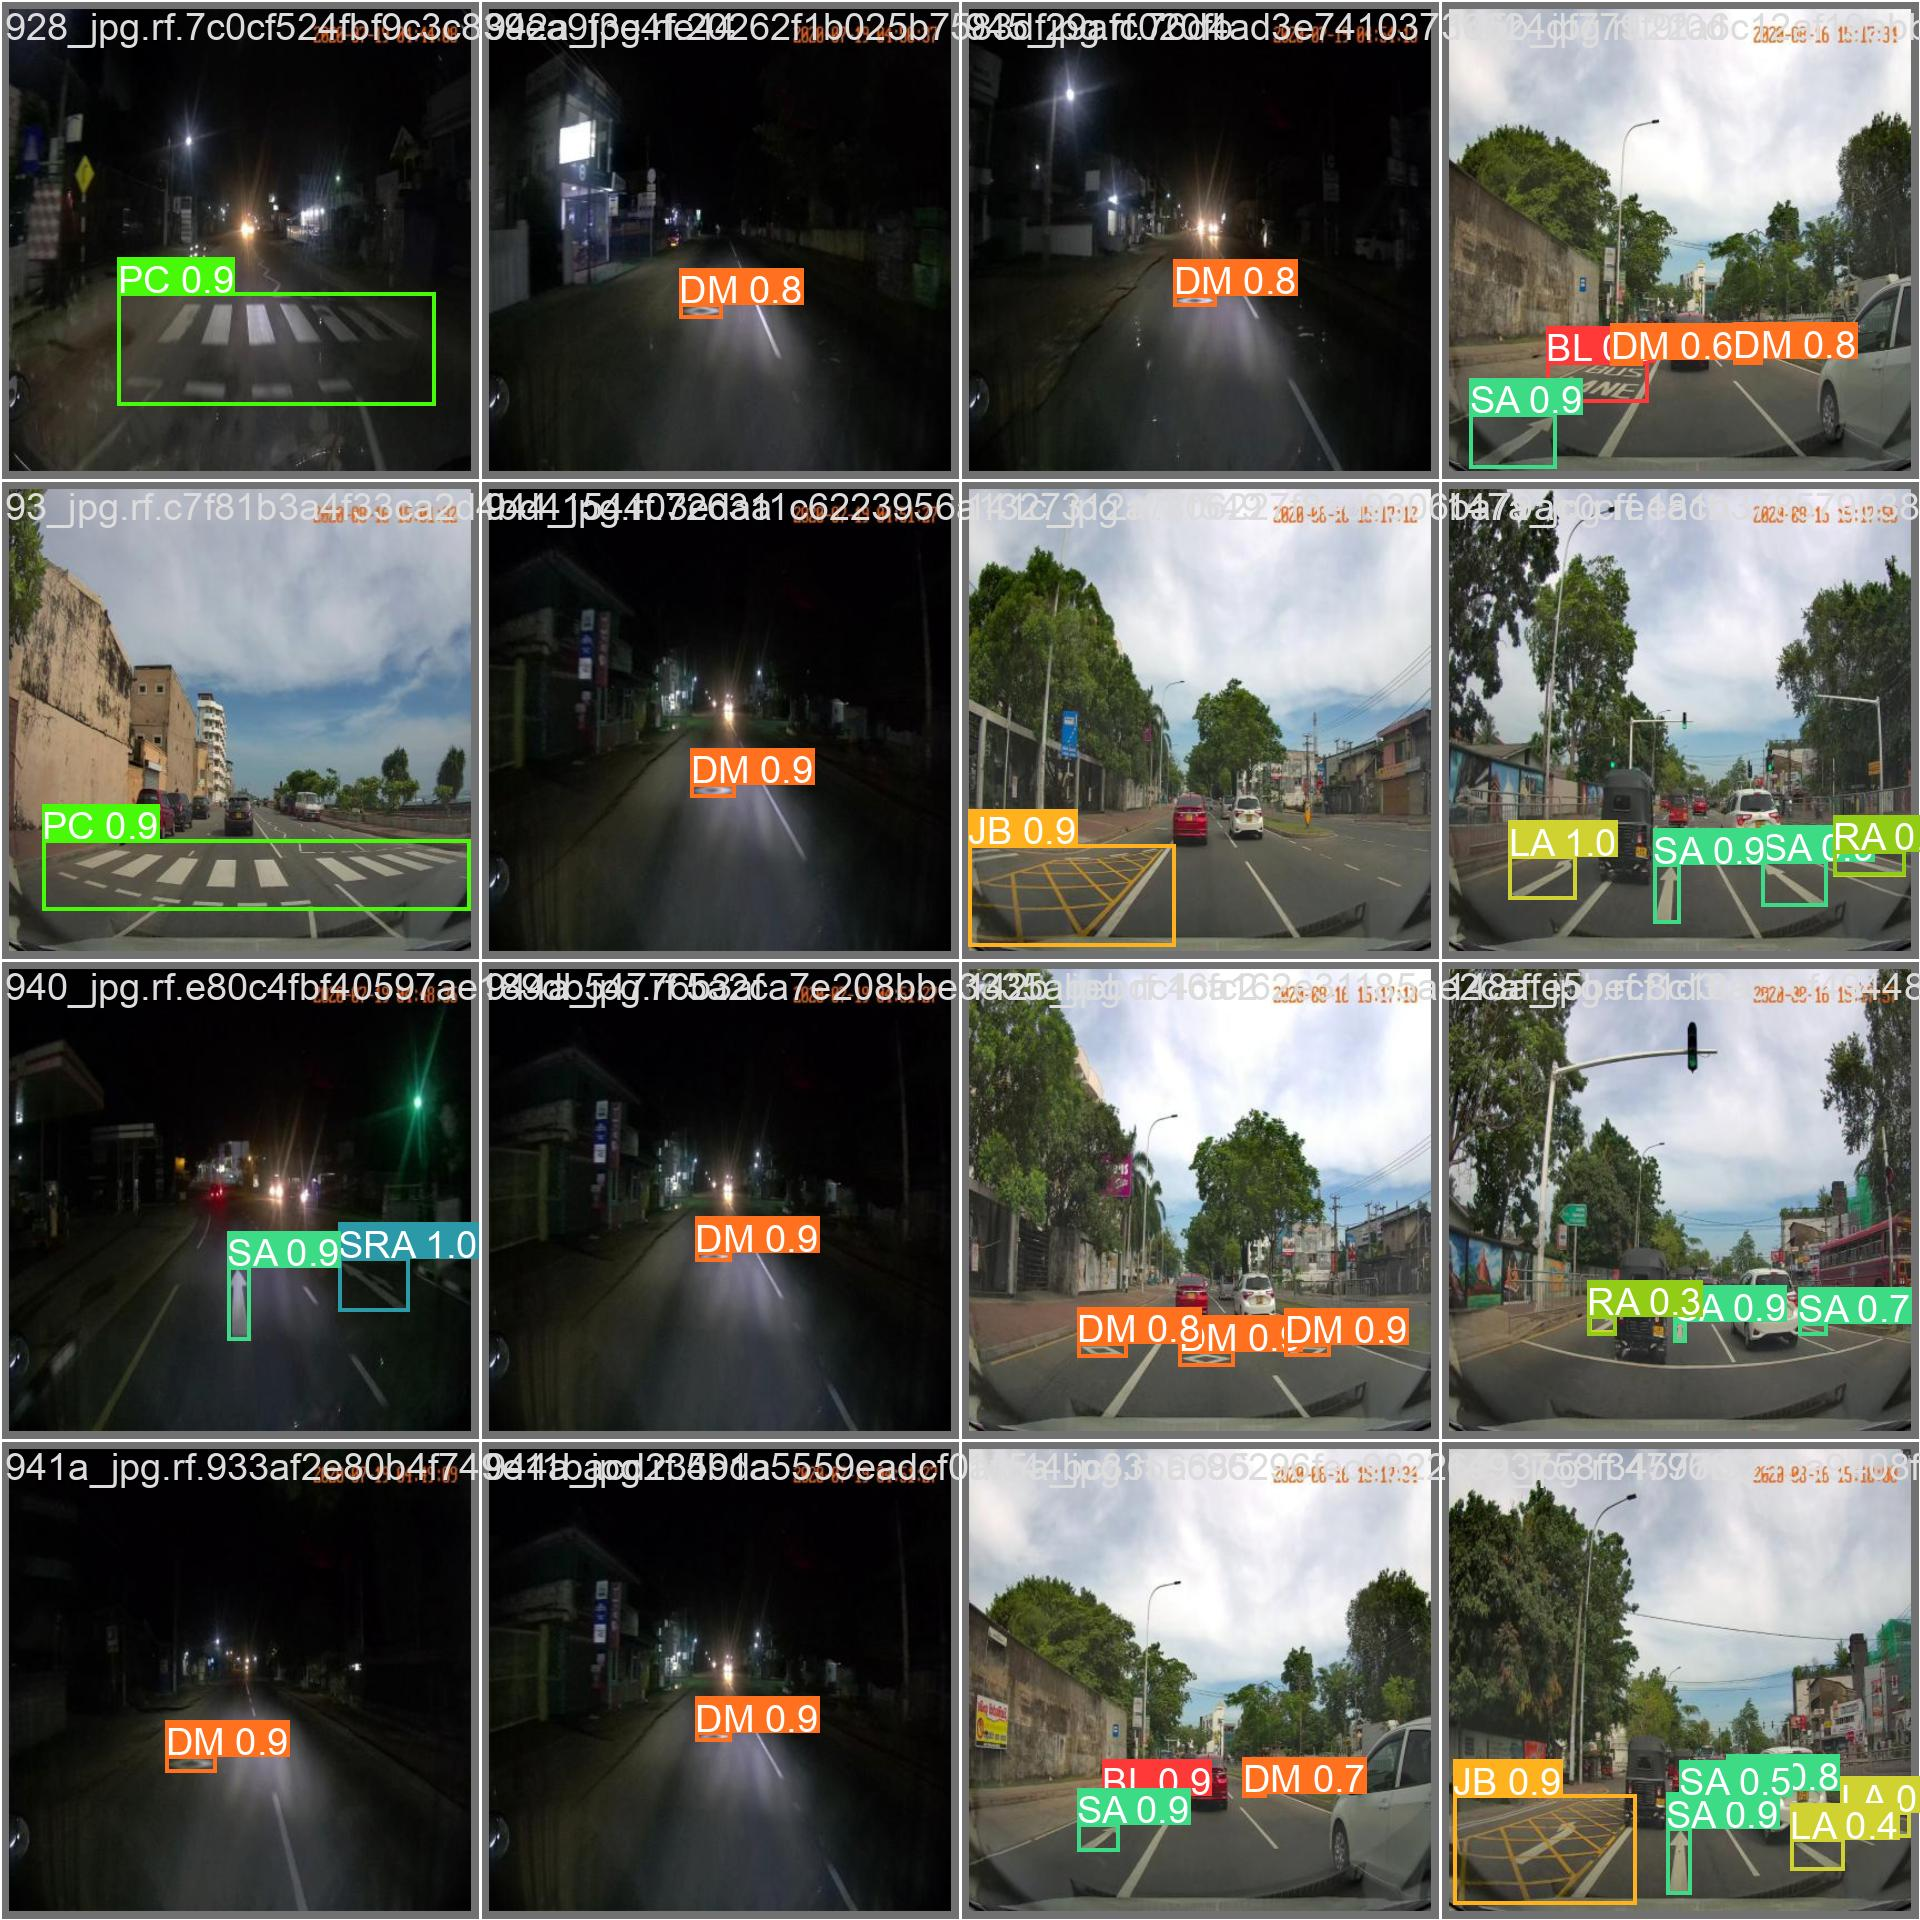

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/road-marking-1/valid/labels.cache... 165 images, 0 backgrounds, 0 corrupt: 100% 165/165 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:07<00:00,  1.45it/s]
                   all        165        247      0.913      0.944      0.962      0.794
                    BL        165          7      0.696          1      0.995      0.789
                    CL        165          3      0.926          1      0.995      0.724
                    DM        165         49          1      0.979      0.982      0.819
                    JB        165         11       0.98          1      0.995      0.813
                    LA        165         10      0.773        0.7      0.708      0.571
                    PC   

## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/82 /content/datasets/road-marking-1/test/images/131_jpg.rf.28474748e4d8f171b54f6dd342b8f465.jpg: 800x800 1 JB, 22.6ms
image 2/82 /content/datasets/road-marking-1/test/images/140_jpg.rf.767f9941b9d864718793931322cfe9a1.jpg: 800x800 1 BL, 1 SA, 22.5ms
image 3/82 /content/datasets/road-marking-1/test/images/141_jpg.rf.c708f1f190a21338b8a650ade1584f74.jpg: 800x800 1 JB, 22.5ms
image 4/82 /content/datasets/road-marking-1/test/images/144_jpg.rf.201c922d2a58356f74e4740b45d2b1c3.jpg: 800x800 1 BL, 4 DMs, 22.4ms
image 5/82 /content/datasets/road-marking-1/test/images/148_jpg.rf.dc7644275fd11f6fd4b3e3b4c570a506.jpg: 800x800 1 LA, 1 RA, 3 SAs, 22.4ms
image 6/82 /content/datasets/road-marking-1/test/images/156a_jpg.rf.6d32c109d150eb0db91764e0e1ba0c2f.jpg: 800x800 1 BL, 1 S